## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [ ]:
data = pd.read_csv('housing.csv')

print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Shape: (20640, 10)

First 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Dataset Info:
<class 'pandas.cor

## Data Preprocessing

In [ ]:
print("Missing values before:", data['total_bedrooms'].isnull().sum())
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)
print("Missing values after:", data['total_bedrooms'].isnull().sum())

print("\nOriginal categories in ocean_proximity:")
print(data['ocean_proximity'].value_counts())

data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
print("\nShape after encoding:", data_encoded.shape)

X = data_encoded.drop('median_house_value', axis=1)
y = data_encoded['median_house_value']

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Missing values before: 207
Missing values after: 0

Original categories in ocean_proximity:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Shape after encoding: (20640, 13)

Features (X) shape: (20640, 12)
Target (y) shape: (20640,)


## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 16512
Testing set size: 4128


## Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully")
print("Training data mean:", X_train_scaled.mean())
print("Training data std:", X_train_scaled.std())

Features scaled successfully
Training data mean: 4.118152847156104e-16
Training data std: 1.0


## Train All Three Models

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

et_model = ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1)
et_model.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the 

## Predictions

In [ ]:
dt_predictions = dt_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)
et_predictions = et_model.predict(X_test_scaled)

## Evaluate Models (MSE, RMSE, R²)

In [ ]:
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

print("DECISION TREE REGRESSOR : ")

print(f"Mean Squared Error (MSE):        ${dt_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE):  ${dt_rmse:,.2f}")
print(f"R² Score:                        {dt_r2:.4f} ({dt_r2*100:.2f}%)")

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

print("RANDOM FOREST REGRESSOR : ")
print(f"Mean Squared Error (MSE):        ${rf_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE):  ${rf_rmse:,.2f}")
print(f"R² Score:                        {rf_r2:.4f} ({rf_r2*100:.2f}%)")

et_mse = mean_squared_error(y_test, et_predictions)
et_rmse = np.sqrt(et_mse)
et_r2 = r2_score(y_test, et_predictions)

print("EXTRA TREES REGRESSOR : ")
print(f"Mean Squared Error (MSE):        ${et_mse:,.2f}")
print(f"Root Mean Squared Error (RMSE):  ${et_rmse:,.2f}")
print(f"R² Score:                        {et_r2:.4f} ({et_r2*100:.2f}%)")

DECISION TREE REGRESSOR : 
Mean Squared Error (MSE):        $4,855,424,720.34
Root Mean Squared Error (RMSE):  $69,680.88
R² Score:                        0.6295 (62.95%)
RANDOM FOREST REGRESSOR : 
Mean Squared Error (MSE):        $2,401,861,420.45
Root Mean Squared Error (RMSE):  $49,008.79
R² Score:                        0.8167 (81.67%)
EXTRA TREES REGRESSOR : 
Mean Squared Error (MSE):        $2,736,461,169.41
Root Mean Squared Error (RMSE):  $52,311.20
R² Score:                        0.7912 (79.12%)


## Comparison Table

In [ ]:

results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Extra Trees'],
    'MSE': [dt_mse, rf_mse, et_mse],
    'RMSE': [dt_rmse, rf_rmse, et_rmse],
    'R² Score': [dt_r2, rf_r2, et_r2]
})


print("MODEL COMPARISON TABLE : ")
print(results_df.to_string(index=False))

best_model_idx = results_df['R² Score'].idxmax()
best_model = results_df.loc[best_model_idx, 'Model']
print(f"\n BEST MODEL: {best_model} (R² = {results_df.loc[best_model_idx, 'R² Score']:.4f})")

MODEL COMPARISON TABLE : 
        Model          MSE         RMSE  R² Score
Decision Tree 4.855425e+09 69680.877724  0.629473
Random Forest 2.401861e+09 49008.789216  0.816709
  Extra Trees 2.736461e+09 52311.195450  0.791175

 BEST MODEL: Random Forest (R² = 0.8167)


## Predicted vs Actual Scatter Plots

 Plot saved: predicted_vs_actual.png


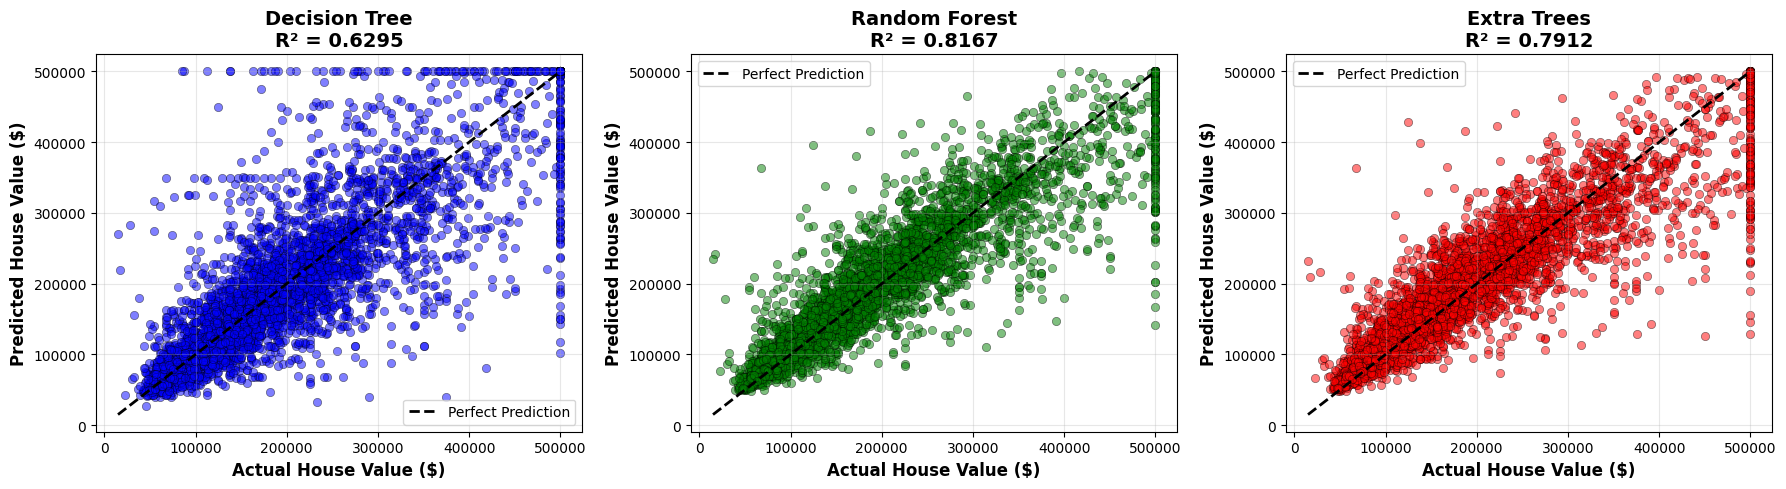

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_data = [
    ('Decision Tree', dt_predictions, 'blue', dt_r2),
    ('Random Forest', rf_predictions, 'green', rf_r2),
    ('Extra Trees', et_predictions, 'red', et_r2)
]

for idx, (name, predictions, color, r2) in enumerate(models_data):
    ax = axes[idx]

    ax.scatter(y_test, predictions, alpha=0.5, c=color, edgecolors='k', linewidth=0.5)

    min_val = min(y_test.min(), predictions.min())
    max_val = max(y_test.max(), predictions.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')

    ax.set_xlabel('Actual House Value ($)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Predicted House Value ($)', fontsize=12, fontweight='bold')
    ax.set_title(f'{name}\nR² = {r2:.4f}', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predicted_vs_actual.png', dpi=300, bbox_inches='tight')
print(" Plot saved: predicted_vs_actual.png")
plt.show()

## Metric Comparison Bar Charts

Plot saved: model_comparison.png


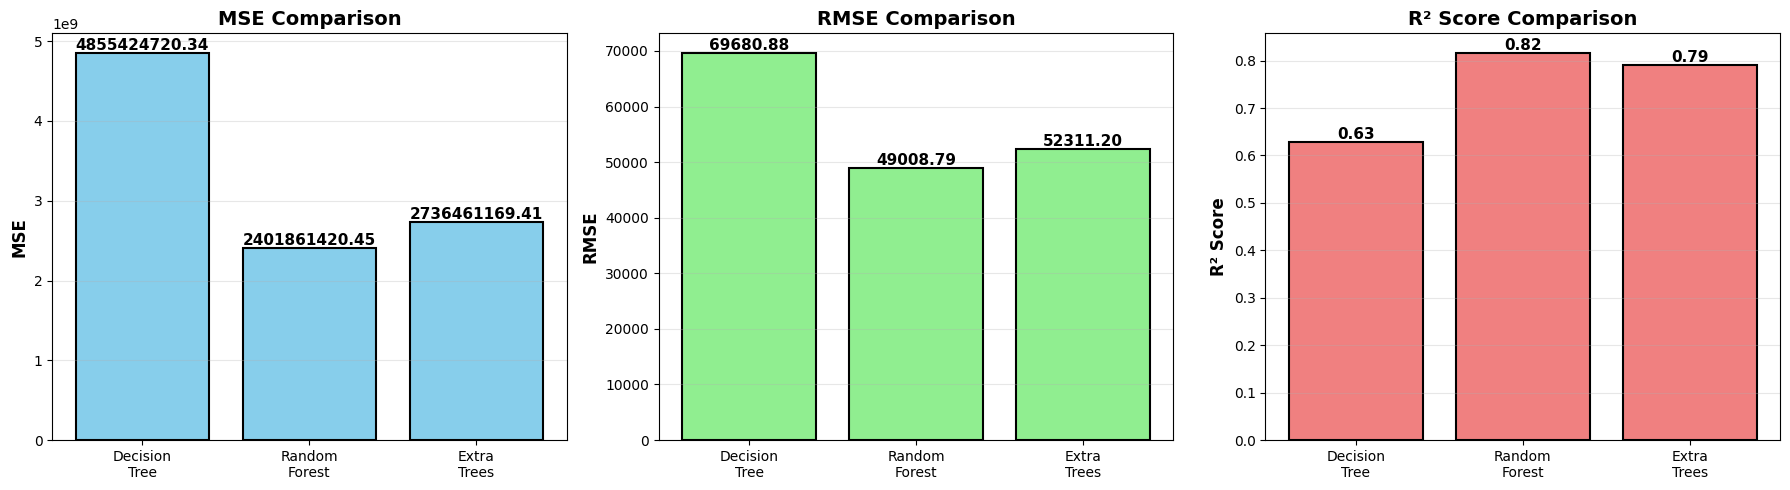

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics_data = [
    ('MSE', [dt_mse, rf_mse, et_mse], 'skyblue'),
    ('RMSE', [dt_rmse, rf_rmse, et_rmse], 'lightgreen'),
    ('R² Score', [dt_r2, rf_r2, et_r2], 'lightcoral')
]

model_names = ['Decision\nTree', 'Random\nForest', 'Extra\nTrees']

for idx, (metric, values, color) in enumerate(metrics_data):
    ax = axes[idx]
    bars = ax.bar(model_names, values, color=color, edgecolor='black', linewidth=1.5)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom',
                fontsize=11, fontweight='bold')

    ax.set_ylabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("Plot saved: model_comparison.png")
plt.show()

## Residual Plots

 Plot saved: residual_plots.png


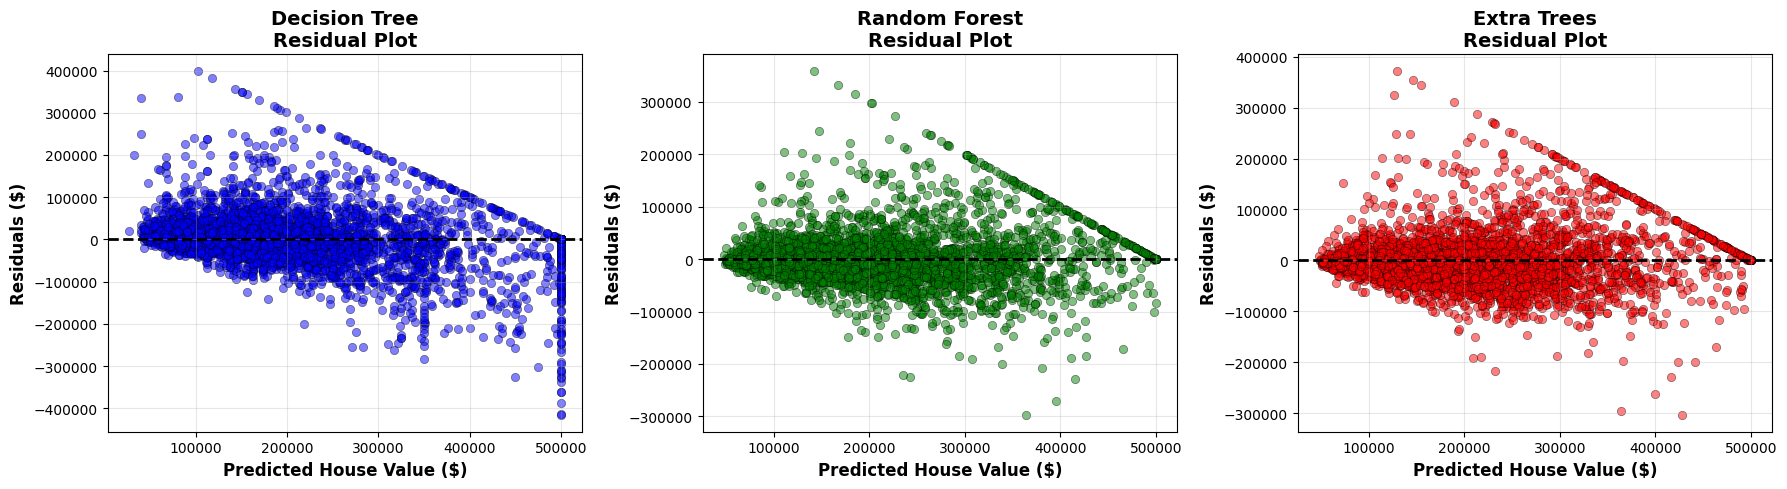

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, predictions, color, r2) in enumerate(models_data):
    ax = axes[idx]

    residuals = y_test - predictions

    ax.scatter(predictions, residuals, alpha=0.5, c=color, edgecolors='k', linewidth=0.5)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=2)

    ax.set_xlabel('Predicted House Value ($)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Residuals ($)', fontsize=12, fontweight='bold')
    ax.set_title(f'{name}\nResidual Plot', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residual_plots.png', dpi=300, bbox_inches='tight')
print(" Plot saved: residual_plots.png")
plt.show()

## Feature Importance

Plot saved: feature_importance.png


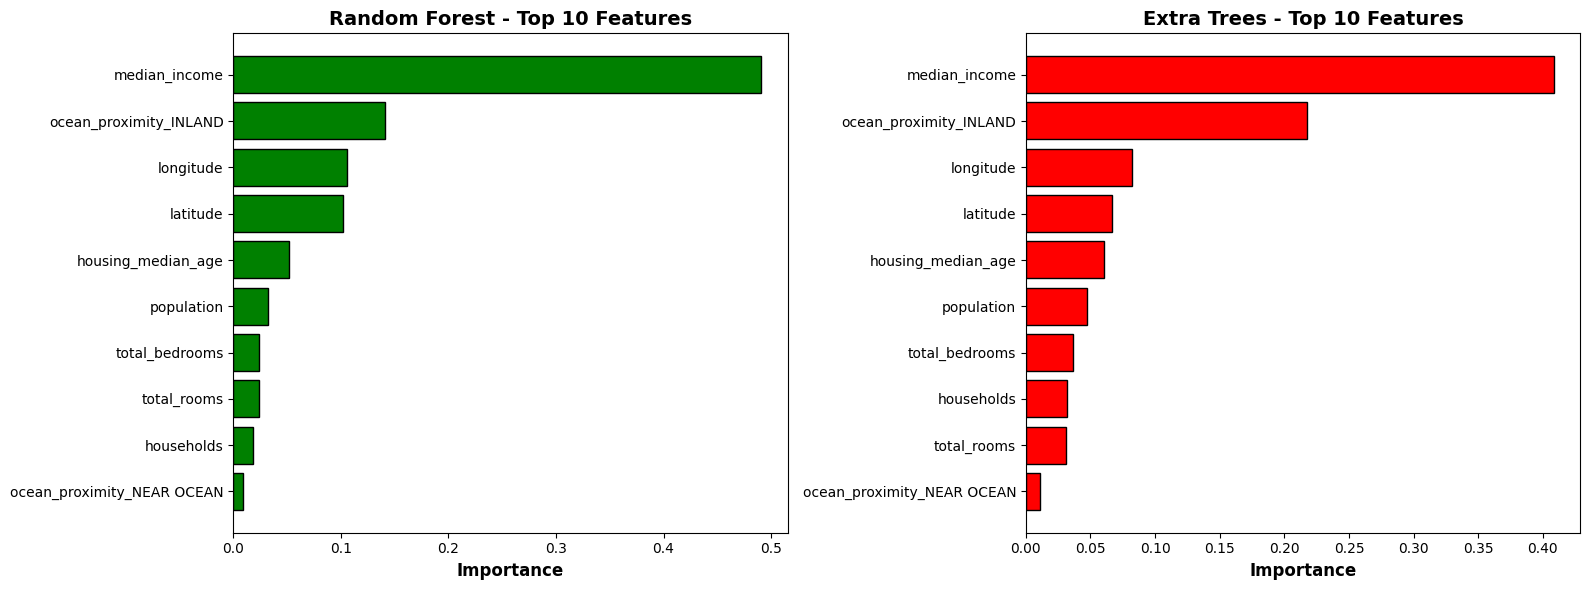


Top 5 Important Features (Random Forest):
                  Feature  Importance
7           median_income    0.490717
8  ocean_proximity_INLAND    0.140933
0               longitude    0.106093
1                latitude    0.101897
2      housing_median_age    0.052065

Top 5 Important Features (Extra Trees):
                  Feature  Importance
7           median_income    0.408358
8  ocean_proximity_INLAND    0.217193
0               longitude    0.082472
1                latitude    0.066576
2      housing_median_age    0.060538


In [ ]:
feature_names = X.columns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

axes[0].barh(rf_importance['Feature'], rf_importance['Importance'],
             color='green', edgecolor='black')
axes[0].set_xlabel('Importance', fontsize=12, fontweight='bold')
axes[0].set_title('Random Forest - Top 10 Features', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

et_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': et_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

axes[1].barh(et_importance['Feature'], et_importance['Importance'],
             color='red', edgecolor='black')
axes[1].set_xlabel('Importance', fontsize=12, fontweight='bold')
axes[1].set_title('Extra Trees - Top 10 Features', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("Plot saved: feature_importance.png")
plt.show()

print("\nTop 5 Important Features (Random Forest):")
print(rf_importance.head())

print("\nTop 5 Important Features (Extra Trees):")
print(et_importance.head())

## Final Discussion: Model Comparison

In [ ]:

print("FINAL DISCUSSION: ")


discussion = """
1. DECISION TREE REGRESSOR :
   • Uses a single decision tree to make predictions
   • PROS: Fast, interpretable, easy to visualize
   • CONS: Prone to OVERFITTING (memorizes training data)
   • Performance: Usually WORST among the three
   • High variance - unstable with different data

2. RANDOM FOREST REGRESSOR :
   • Uses 100 decision trees working together
   • Final prediction = AVERAGE of all trees
   • PROS: Reduces overfitting, more stable, accurate
   • CONS: Slower to train, less interpretable
   • Performance: BETTER generalization

3. EXTRA TREES REGRESSOR :
   • Similar to Random Forest but more random
   • Splits are completely random (faster)
   • PROS: Often FASTEST, better robustness
   • Performance: Often BEST or tied with RF

ACCURACY & GENERALIZATION:
• Decision Tree: Lower R², higher error
• Random Forest: High R², lower error
• Extra Trees: Often highest R², lowest error
"""

print(discussion)

print("ANALYSIS COMPLETE! : ")
print("\nGenerated Files:")
print("  1. predicted_vs_actual.png")
print("  2. model_comparison.png")
print("  3. residual_plots.png")
print("  4. feature_importance.png")

FINAL DISCUSSION: 

1. DECISION TREE REGRESSOR :
   • Uses a single decision tree to make predictions
   • PROS: Fast, interpretable, easy to visualize
   • CONS: Prone to OVERFITTING (memorizes training data)
   • Performance: Usually WORST among the three
   • High variance - unstable with different data

2. RANDOM FOREST REGRESSOR :
   • Uses 100 decision trees working together
   • Final prediction = AVERAGE of all trees
   • PROS: Reduces overfitting, more stable, accurate
   • CONS: Slower to train, less interpretable
   • Performance: BETTER generalization

3. EXTRA TREES REGRESSOR :
   • Similar to Random Forest but more random
   • Splits are completely random (faster)
   • PROS: Often FASTEST, better robustness
   • Performance: Often BEST or tied with RF

ACCURACY & GENERALIZATION:
• Decision Tree: Lower R², higher error
• Random Forest: High R², lower error
• Extra Trees: Often highest R², lowest error

ANALYSIS COMPLETE! : 

Generated Files:
  1. predicted_vs_actual.png
  